<h1 align="center">Lab 12: Introduction to Allen Mouse Brain Atlas Tools</h1>
<h3 align="center">Estimated Duration: 30 mins</h3>

## Introduction

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    In the first part of the lab, we used the Mouse Connectivity Atlas to analyze projection data within regions of the brain. In this part of the lab, we will instead use the Mouse Brain Atlas to explore the gene expression density within specific regions and entire structure of the brain

</center></p>. </div>

## Pre-lab: Importing Data

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Similar to the first part of the lab, we will be importing an Allen atlas. The cell below downloads all Mouse Brain experiments, expression density, and griddata that we'll be using to analyze gene expression. However, unlike the previous lab, we will take you through an example of gene data analysis with the subiculum and allow you to repeat this lab with a brain region and gene of your choice. 

</div>

In [1]:
# Run this cell
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.ontologies_api import OntologiesApi

%matplotlib inline 
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

from allensdk.api.queries.mouse_atlas_api import MouseAtlasApi
from allensdk.core import sitk_utilities
from allensdk.api.cache import Cache, cacheable

from allensdk.api.queries.reference_space_api import ReferenceSpaceApi
from allensdk.api.queries.grid_data_api import GridDataApi
from allensdk.api.queries.rma_pager import pageable

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
Note: This lab will be split into two rounds, the first of which will simply be taking you through analysis with the subiculum. Following this, you will see instructions being split into **1st round** and **2nd round**. 
    
    1st round: We will be reading data that we imported into this lab folder through the read_csv() method that takes in a .csv file and converts its contents into a table.
    
    2nd round: Replace the file name within the quotations in read_csv() with the file you downloaded.
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    Run the next cell block to check if the data was successfully retrieved. You should see a table with a list of 19 experiments for the subiculum. From now on, we'll be using the variable maa to retrieve all data.

</div>

In [2]:
# Creates variables to access the API with.
maa = pd.read_csv("convertcsv.csv")
maa

,id,name,gene-id,gene-symbol,gene-name,entrez-id,chromosome,plane-of-section,specimen-id,fold-change,target-sum,contrast-sum,num-target-samples,num-contrast-samples
0,74003393,RP_060119_02_B01,88778,Gpr161,G protein-coupled receptor 161,240888,1,sagittal,NaN,16.080,2829.416,15265.243,320,27762
1,74003403,RP_050331_02_D08,88778,Gpr161,G protein-coupled receptor 161,240888,1,sagittal,NaN,14.725,2630.611,14340.334,315,25286
2,70238866,RP_050526_04_C05,71750,Dio3,"deiodinase, iodothyronine type III",107585,12,sagittal,NaN,12.606,311.267,2028.147,296,24312
3,1364,RP_Baylor_103371,86272,Grp,gastrin releasing peptide,225642,18,sagittal,NaN,10.960,938.078,6998.214,317,25919
4,70562045,RP_050331_02_D08,88778,Gpr161,G protein-coupled receptor 161,240888,1,coronal,NaN,10.644,3845.768,31005.322,320,27460
5,1363,RP_Baylor_103371,86272,Grp,gastrin releasing peptide,225642,18,coronal,NaN,8.617,945.714,9300.524,302,25591
6,74357582,RP_051012_03_E02,42404,2310042E22Rik,RIKEN cDNA 2310042E22 gene,66561,16,coronal,NaN,8.483,430.646,4236.764,313,26121
7,71717188,RP_050526_04_C05,71750,Dio3,"deiodinase, iodothyronine type III",107585,12,coronal,NaN,8.041,349.997,3680.563,320,27059
8,1305,RP_Baylor_103087,21823,Trpc4,"transient receptor potential cation channel, s...",22066,3,coronal,NaN,7.541,2692.816,29984.627,320,26871
9,71016632,RP_050725_03_B01,88569,Rspo2,R-spondin 2 homolog (Xenopus laevis),239405,15,coronal,NaN,7.112,930.369,9461.892,320,23146


## Part 1: Gene Expression Within Brain Regions

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

In this section, we will begin to explore the relationship between the expression tendencies of specific genes within brain regions.

</div>

## Part 1.1: Selecting a gene

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

1st round: We'll be analyzing G protein-coupled receptor 161 (Gpr 161) and its relevance in the subiculum. Since we no longer need other experiments for now, we'll be taking only experiments that have the gene id Gpr 161 by  

2nd round: Replace Gpr161 to the gene of your choice. You may also change the variable name gpr161, if you choose. Then run the cell block. One way to vertify that the code retrieval was successful is by counting how many rows in the above table have the gene-symbol of your choice. You should see the same number of rows below.

</div>

In [3]:
#selecting rows that match the gene symbol Gpr161
gpr161 = maa[maa["gene-symbol"] == "Gpr161"]
gpr161

,id,name,gene-id,gene-symbol,gene-name,entrez-id,chromosome,plane-of-section,specimen-id,fold-change,target-sum,contrast-sum,num-target-samples,num-contrast-samples
0,74003393,RP_060119_02_B01,88778,Gpr161,G protein-coupled receptor 161,240888,1,sagittal,NaN,16.080,2829.416,15265.243,320,27762
1,74003403,RP_050331_02_D08,88778,Gpr161,G protein-coupled receptor 161,240888,1,sagittal,NaN,14.725,2630.611,14340.334,315,25286
4,70562045,RP_050331_02_D08,88778,Gpr161,G protein-coupled receptor 161,240888,1,coronal,NaN,10.644,3845.768,31005.322,320,27460


## Part 1.2 : Calculating gene expression density

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
1st round: To calculate density, we will create a function called **percentage**. This function takes in one parameter: 
       
       gene: the gene-symbol of the gene currently being analyzed 

**Percentage** will display the percent that your gene appears relative to all genes in the subiculum. To calculate proportion, we use the total amount of times the gene appears in the subiculum over the total amount of gene expression in that region and multiply this value by 100 to get the percent. 

To store the number of times we see our gene_id and the number of genes total, we'll create the variables occurrences and total respectively. 

2nd round: If you changed the variable name gpr161 earlier, replace the name here. Otherwise, run the cell block to get the percentage of your chosen gene in your brain region.

</div>

In [4]:
def percentage(gene):
    occurrences = gene["num-target-samples"].sum()
    total = maa["num-target-samples"].sum()
    return occurrences / total * 100
percentage(gpr161)

15.948563794255177

## Part 1.3: Most Common Gene Expressions 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
1st found: To ensure you are on the right track, below is a bar graph indicating the three most expressed genes in the subiculum. Simply run the cell block.

2nd round: Fill in your specified brain region within quotations below. Then, run the code below to construct a bar graph showing data relevant to your brain region.

</div>

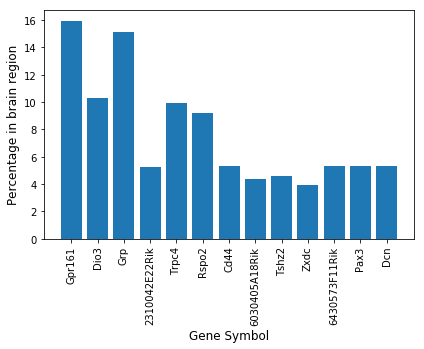

In [6]:
def bar_graph():
    listOfGenes = [] #gathering all unique gene symbols 
    for g in maa["gene-symbol"]:
        if g not in listOfGenes: 
            listOfGenes += [g] 
    
    percentages = [] #percentage of gene expression of each unique gene symbol relative to all gene expression 
    for gene in listOfGenes: 
        geneData = maa[maa["gene-symbol"] == gene]
        percentages += [percentage(geneData)]
        
    plt.bar(listOfGenes, percentages) #plotting
    plt.xlabel('Gene Symbol', fontsize = 12)
    plt.ylabel('Percentage in brain region', fontsize = 12)
    plt.tight_layout()
    plt.xticks(rotation=90)
    
bar_graph()

## Part 2: Free Exploration

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
As described earlier, you'll now get the chance to run through this lab with a brain region and gene of your choosing. In order to, we have to find and import the specified data. Below are instructions to get you started.
    
          1. Go to the Mouse Brain Atlas website from the Allen Brain Atlas website.
          2. On the left bar about midway down the page, click on differential search. 
          3. Enter your brain region into target structures, and click search. 
          4. Click on XML at the bottom of the page. It should say "this data is available in XML." Save that file in the same folder as your lab. You should be able to open the home page and see both the file and the lab. 
          5. Go to http://convertcsv.com/xml-to-csv.htm to convert your XML file to CSV file. You are free to choose whatever file name you want, so long as it differs from the one used already in our example (convertcsv.csv). Make sure to save this file in the same folder as your lab. 
          6. You're good to go! Run through this lab again, this time reading instructions for 2nd round. 
              
</div> 